# Python and Chess

In [3]:
# Import libraries
import chess
import random
import chess.polyglot
import chess.svg
from IPython.display import SVG
import pandas as pd
from rich import print


Ressources:
- https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/Programming%20a%20Chess%20Player.ipynb
- https://colab.research.google.com/github/iAmEthanMai/chess-engine-model/blob/main/python_chess_engine.ipynb#scrollTo=tIks0yXVpEw2
- https://andreasstckl.medium.com/writing-a-chess-program-in-one-day-30daff4610ec

## Random board moves and board table

In [4]:
# Functions
def rand_board(moves):
    ''' Returns a random board with a given number of moves'''
    board = chess.Board()
    for i in range(moves):
        rand_move = random.choice(list(board.legal_moves))
        # Print the move
        print(rand_move)
        board.push(rand_move)
    return print(board)  # Return printed or FEN board


rand_board(10)


# Return a random changing move
def rand_board_moves_df(moves):
    ''' Move given number of moves and return a DataFrame with the chosen move, the number of possible moves, and all moves'''
    board = chess.Board()
    data = []
    for i in range(moves):
        # Get all legal moves
        moves_list = []
        for move in board.legal_moves:
            moves_list.append(str(move))
        # Get a random move
        rand_move = random.choice(list(board.legal_moves))
        # Count the possible moves
        num_moves = len(moves_list)
        # Append data to list
        data.append([rand_move, num_moves, moves_list])
        # Make the move
        board.push(rand_move)

    # Return dataframe with the chosen move, the number of possible moves and all moves
    df = pd.DataFrame(data, columns=['Chosen Move', 'Number of Possible Moves', 'All Moves'])
    return df


rand_board_moves_df(10)


def rand_board_moves(moves):
    ''' Move given number of moves and return a DataFrame with the chosen move, the number of possible moves, and all moves'''
    board = chess.Board()
    data = []
    for i in range(moves):
        # Get all legal moves
        moves_list = []
        for move in board.legal_moves:
            moves_list.append(str(move))
        # Get a random move
        rand_move = random.choice(list(board.legal_moves))
        # Count the possible moves
        num_moves = len(moves_list)
        # Append data to list
        data.append([rand_move, num_moves, moves_list])
        # Make the move
        board.push(rand_move)

    # Return dataframe with the chosen move, the number of possible moves and all moves
    df = pd.DataFrame(data, columns=['Chosen Move', 'Number of Possible Moves', 'All Moves'])
    return SVG(chess.svg.board(board=board, size=400))

Move.from_uci('a2a3')

Move.from_uci('g8h6')

Move.from_uci('c2c4')

Move.from_uci('h6g4')

Move.from_uci('g1h3')

Move.from_uci('g4h2')

Move.from_uci('c4c5')

Move.from_uci('a7a5')

Move.from_uci('c5c6')

Move.from_uci('d7c6')

r n b q k b . r
. p p . p p p p
. . p . . . . .
p . . . . . . .
. . . . . . . .
P . . . . . . N
. P . P P P P n
R N B Q K B . R

## A 'normal' Game

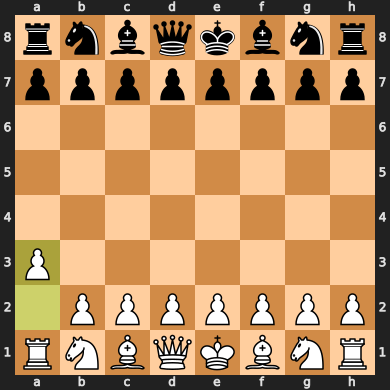

In [5]:
# First move
board = chess.Board()
# Return a random changing move
rand_move = random.choice(list(board.legal_moves))
# Make the move
board.push(rand_move)
board

In [4]:
# Legal moves
board.legal_moves
# board.legal_moves.count()

<LegalMoveGenerator at 0x173b65600 (Nh6, Nf6, Nc6, Na6, h6, g6, f6, e6, d6, c6, b6, a6, h5, g5, f5, e5, d5, c5, b5, a5)>

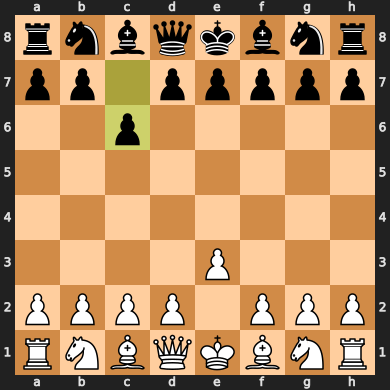

In [5]:
board.legal_moves
rand_move2 = random.choice(list(board.legal_moves))
board.push(rand_move2)
board

### Random Moves

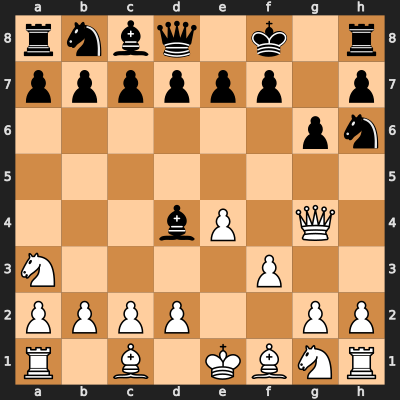

In [9]:
board = rand_board_moves(10)
board

In [8]:
rand_board_moves_df(10)

,Chosen Move,Number of Possible Moves,All Moves
0,g2g4,20,"[g1h3, g1f3, b1c3, b1a3, h2h3, g2g3, f2f3, e2e..."
1,g7g5,20,"[g8h6, g8f6, b8c6, b8a6, h7h6, g7g6, f7f6, e7e..."
2,f1g2,20,"[g1h3, g1f3, f1h3, f1g2, b1c3, b1a3, h2h3, f2f..."
3,a7a6,20,"[g8h6, g8f6, f8g7, f8h6, b8c6, b8a6, h7h6, f7f..."
4,e2e3,26,"[g2b7, g2c6, g2d5, g2e4, g2h3, g2f3, g2f1, g1h..."
5,h7h5,19,"[g8h6, g8f6, f8g7, f8h6, b8c6, a8a7, h7h6, f7f..."
6,g1h3,30,"[g2b7, g2c6, g2d5, g2e4, g2h3, g2f3, g2f1, g1h..."
7,c7c6,21,"[h8h7, h8h6, g8h6, g8f6, f8g7, f8h6, b8c6, a8a..."
8,h3g5,29,"[h3g5, h3f4, h3g1, g2c6, g2d5, g2e4, g2f3, g2f..."
9,a6a5,22,"[h8h7, h8h6, g8h6, g8f6, f8g7, f8h6, d8c7, d8b..."


## Attacked Squares

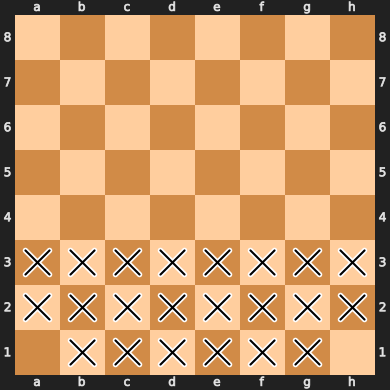

In [10]:
def attacked_squares(board, color):
    attacked = chess.SquareSet()
    for attacker in chess.SquareSet(board.occupied_co[color]):
        attacked |= board.attacks(attacker)

    return attacked

attacked_squares(chess.Board(), chess.WHITE)
#attacked_squares(chess.Board(), chess.BLACK)

In [11]:
# check all squares for attackers and return a list of attackers for each square
def attackers(board, color):
    attackers = {}
    for square in chess.SQUARES:
        attackers[square] = board.attackers(color, square)
    return attackers

attackers(chess.Board(), chess.WHITE)

{0: SquareSet(0x0000_0000_0000_0000),
 1: SquareSet(0x0000_0000_0000_0001),
 2: SquareSet(0x0000_0000_0000_0008),
 3: SquareSet(0x0000_0000_0000_0010),
 4: SquareSet(0x0000_0000_0000_0008),
 5: SquareSet(0x0000_0000_0000_0010),
 6: SquareSet(0x0000_0000_0000_0080),
 7: SquareSet(0x0000_0000_0000_0000),
 8: SquareSet(0x0000_0000_0000_0001),
 9: SquareSet(0x0000_0000_0000_0004),
 10: SquareSet(0x0000_0000_0000_0008),
 11: SquareSet(0x0000_0000_0000_001e),
 12: SquareSet(0x0000_0000_0000_0078),
 13: SquareSet(0x0000_0000_0000_0010),
 14: SquareSet(0x0000_0000_0000_0020),
 15: SquareSet(0x0000_0000_0000_0080),
 16: SquareSet(0x0000_0000_0000_0202),
 17: SquareSet(0x0000_0000_0000_0500),
 18: SquareSet(0x0000_0000_0000_0a02),
 19: SquareSet(0x0000_0000_0000_1400),
 20: SquareSet(0x0000_0000_0000_2800),
 21: SquareSet(0x0000_0000_0000_5040),
 22: SquareSet(0x0000_0000_0000_a000),
 23: SquareSet(0x0000_0000_0000_4040),
 24: SquareSet(0x0000_0000_0000_0000),
 25: SquareSet(0x0000_0000_0000_000

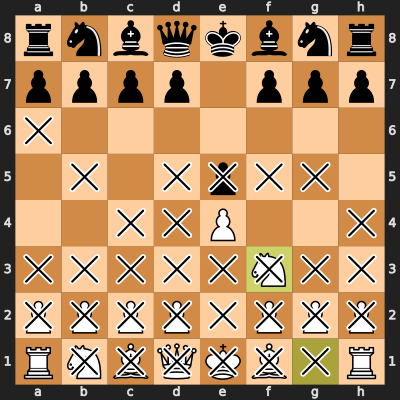

In [12]:
# Visualize open attacks
board = chess.Board()
board.push_san("e4")
board.push_san("e5")
board.push_san("Nf3")

SVG(chess.svg.board(board, size=400, lastmove=board.peek(), squares=attacked_squares(board, chess.BLACK)))
SVG(chess.svg.board(board, size=400, lastmove=board.peek(), squares=attacked_squares(board, chess.WHITE)))

g2g3
b8a6
d2d3
b7b5
b2b4
d7d6
a2a3
e7e6
g3g4
f7f5


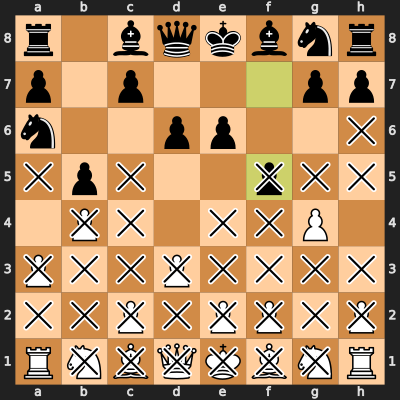

In [15]:
def rand_board_analysis(moves, color):
    ''' Move given number of moves and return the number of attacked squares with svg by the given color'''
    board = chess.Board()
    for i in range(moves):
        rand_move = random.choice(list(board.legal_moves))
        # Print the move
        print(rand_move)
        board.push(rand_move)
    return SVG(chess.svg.board(board, size=400, lastmove=board.peek(), squares=attacked_squares(board, color)))

rand_board_analysis(10, chess.WHITE)

## Board Status

In [29]:
# find move with highest score
def board_status_print(board):
    try:
        last_move = board.peek()
    except:
        last_move = None
    fen = board.fen()
    is_check = board.is_check()
    is_checkmate = board.is_checkmate()
    is_stalemate = board.is_stalemate()
    is_insufficient_material = board.is_insufficient_material()
    legal_moves = list(board.legal_moves)
    num_legal_moves = len(legal_moves)
    status = board.status()

    summary = {
        "fen": fen,
        "turn": board.turn,
        "last_move": last_move,
        "is_check": is_check,
        "is_checkmate": is_checkmate,
        "is_stalemate": is_stalemate,
        "is_insufficient_material": is_insufficient_material,
        "num_legal_moves": num_legal_moves,
        "status": status,
        "castling_rights_white": board.has_castling_rights(chess.WHITE),
        "castling_rights_black": board.has_castling_rights(chess.BLACK),
        "pinned": board.is_pinned(chess.WHITE, chess.E2)
    }
    # Transform
    summary = f'''
BOARD SUMMARY:
______________

FEN: {fen}
TURN WHITE: {board.turn}
LEGAL MOVES: {[str(move) for move in legal_moves]}

NUMBER POSSIBLE MOVES: {num_legal_moves}
INSUFFICIENT MATERIAL: {is_insufficient_material}


STATUS {status}
CASTLING RIGHTS WHITE: {board.has_castling_rights(chess.WHITE)}
CASTLING RIGTHS BLACK: {board.has_castling_rights(chess.BLACK)}
PINNED: {board.is_pinned(chess.WHITE, chess.E2)}   # only one field yet

END
IS CHECK: {is_check}
IS STALEMATE: {is_stalemate}
IS CHECKMATE: {is_checkmate}
WINNER: {board.result()}

'''
    return print(summary)

board = chess.Board()
summary = board_status_print(board)
print(summary )

BOARD SUMMARY:
______________

FEN: rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
TURN WHITE: True
LEGAL MOVES: ['g1h3', 'g1f3', 'b1c3', 'b1a3', 'h2h3', 'g2g3', 'f2f3', 'e2e3', 'd2d3', 'c2c3', 'b2b3', 'a2a3', 
'h2h4', 'g2g4', 'f2f4', 'e2e4', 'd2d4', 'c2c4', 'b2b4', 'a2a4']

NUMBER POSSIBLE MOVES: 20
INSUFFICIENT MATERIAL: False


STATUS 0
CASTLING RIGHTS WHITE: True
CASTLING RIGTHS BLACK: True
PINNED: False   # only one field yet

END
IS CHECK: False
IS STALEMATE: False
IS CHECKMATE: False
WINNER: *

None

In [ ]:
# Unmake move
board.pop()  # Unmake the last move

### Visualize board

In [ ]:
# Create four
board = chess.Board()

# First two moves
board.push_san("e4")
board.push_san("e5")
board.push(chess.Move.from_uci("g1f3"))
board.push(chess.Move.from_uci("b8c6"))
board

In [ ]:
# Visualize attacks
SVG(chess.svg.board(board, size=300, lastmove=board.peek(), squares=attacked_squares(board, chess.WHITE)))

In [ ]:
# Color squares if attacked by a piece
SVG(chess.svg.board(board,
                    orientation=chess.BLACK,
                    lastmove=board.peek(),
                    check=board.king(chess.WHITE),
                    arrows=[chess.svg.Arrow(board.king(chess.WHITE), board.king(chess.BLACK))],
                    fill=dict.fromkeys(attacked_squares(board, chess.WHITE), "#ffcccc80"),
                    squares=attacked_squares(board, chess.WHITE),
                    size=300,
                    coordinates=False,
                    flipped=True,
                    colors=dict(white="#ffffff", black="#000000")))

In [ ]:
# Test
import chess
import chess.svg

board = chess.Board("8/8/8/8/4N3/8/8/8 w - - 0 1")

chess.svg.board(
    board,
    fill=dict.fromkeys(board.attacks(chess.E4), "#cc0000cc"),
    arrows=[chess.svg.Arrow(chess.E4, chess.F6, color="#0000cccc")],
    squares=chess.SquareSet(chess.BB_DARK_SQUARES & chess.BB_FILE_B),
    size=350)

In [30]:
# List location of all pieces and their type and color
pieces = []
for square in chess.SQUARES:
    piece = board.piece_at(square)
    if piece:
        pieces.append((piece.symbol(), piece.color,  piece.piece_type, square, chess.square_name(square)))

board_df = pd.DataFrame(pieces, columns=["symbol", "color", "piece_type", "square", "square_name"])
board_df["color"] = board_df["color"].apply(lambda x: "white" if x else "black")
board_df["piece_type_long"] = board_df["piece_type"].apply(lambda x: "pawn" if x == 1 else "knight" if x == 2 else "bishop" if x == 3 else "rook" if x == 4 else "queen" if x == 5 else "king")
board_df["attacked_by_white"] = board_df["square"].apply(lambda x: x in attacked_squares(board, chess.WHITE))
board_df

,symbol,color,piece_type,square,square_name,piece_type_long,attacked_by_white
0,R,white,4,0,a1,rook,False
1,N,white,2,1,b1,knight,True
2,B,white,3,2,c1,bishop,True
3,Q,white,5,3,d1,queen,True
4,K,white,6,4,e1,king,True
5,B,white,3,5,f1,bishop,True
6,N,white,2,6,g1,knight,True
7,R,white,4,7,h1,rook,False
8,P,white,1,8,a2,pawn,True
9,P,white,1,9,b2,pawn,True


## Stockfish Engine

In [31]:
# stockfish engine
import chess.engine
import stockfish

board = chess.Board()
board.push_san("e4")
board.push_san("e5")
fen = board.fen()
stockfish = chess.engine.SimpleEngine.popen_uci("Stockfish-15.1_Mac_Apple_Silicon/stockfish-15.1_Mac_Apple_Silicon")

# Get best move
info = stockfish.analyse(board, chess.engine.Limit(time=0.1))
info

{'string': 'NNUE evaluation using nn-ad9b42354671.nnue enabled',
 'depth': 14,
 'seldepth': 20,
 'multipv': 1,
 'score': PovScore(Cp(+29), WHITE),
 'nodes': 100709,
 'nps': 987343,
 'hashfull': 41,
 'tbhits': 0,
 'time': 0.102,
 'pv': [Move.from_uci('g1f3'), Move.from_uci('g8f6')],
 'upperbound': True}

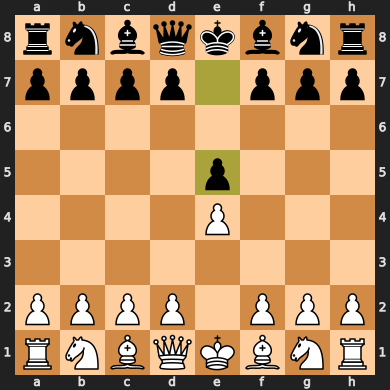

In [32]:
board

In [33]:
best_move = stockfish.play(board, chess.engine.Limit(time=0.1))
best_move

<PlayResult at 0x1744228c0 (move=g1f3, ponder=b8c6, info={}, draw_offered=False, resigned=False)>

# Polyglot opening book

In [ ]:
# polyglot opening book
import chess.polyglot
board = chess.Board()
with chess.polyglot.open_reader("data/polyglot/performance.bin") as reader:
    for entry in reader.find_all(board):
        print(entry.move, entry.weight, entry.learn)

b1c3
c7c5
c3d5
a7a5
b2b4
g7g5
a2a3
e7e5
d5e3
f8e7


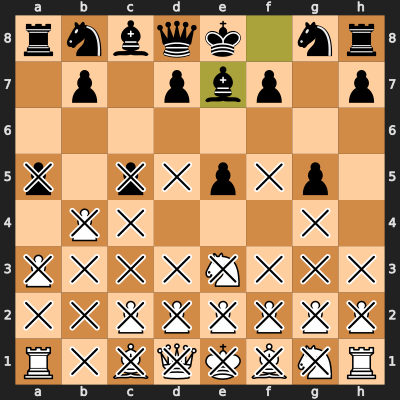

In [8]:
def rand_board_analysis(moves, color):
    ''' Move given number of moves and return the number of attacked squares with svg by the given color'''
    board = chess.Board()
    for i in range(moves):
        rand_move = random.choice(list(board.legal_moves))
        # Print the move
        print(rand_move)
        board.push(rand_move)
    return SVG(chess.svg.board(board, size=400, lastmove=board.peek(), squares=attacked_squares(board, color)))

rand_board_analysis(10, chess.WHITE)

In [20]:
# find move with highest score
def board_status_print(board):
    try:
        last_move = board.peek()
    except:
        last_move = None
    fen = board.fen()
    is_check = board.is_check()
    is_checkmate = board.is_checkmate()
    is_stalemate = board.is_stalemate()
    is_insufficient_material = board.is_insufficient_material()
    legal_moves = list(board.legal_moves)
    num_legal_moves = len(legal_moves)
    status = board.status()

    summary = {
        "fen": fen,
        "turn": board.turn,
        "last_move": last_move,
        "is_check": is_check,
        "is_checkmate": is_checkmate,
        "is_stalemate": is_stalemate,
        "is_insufficient_material": is_insufficient_material,
        "num_legal_moves": num_legal_moves,
        "status": status,
        "castling_rights_white": board.has_castling_rights(chess.WHITE),
        "castling_rights_black": board.has_castling_rights(chess.BLACK),
        "pinned": board.is_pinned(chess.WHITE, chess.E2)
    }
    # Transform
    summary = f'''
Summary:

Turn: {board.turn}
FEN: {fen}
Is check: {is_check}
Is checkmate: {is_checkmate}
Is stalemate: {is_stalemate}
Is insufficient material: {is_insufficient_material}
Number of legal moves: {num_legal_moves}
Legal moves: {[str(move) for move in legal_moves]}
Status: {status}
Castling rights white: {board.has_castling_rights(chess.WHITE)}
Castling rights black: {board.has_castling_rights(chess.BLACK)}
Pinned: {board.is_pinned(chess.WHITE, chess.E2)}

'''
    return summary

board = chess.Board()
summary = board_status_print(board)
print(summary)


Summary:

Turn: True
FEN: rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
Is check: False
Is checkmate: False
Is stalemate: False
Is insufficient material: False
Number of legal moves: 20
Legal moves: ['g1h3', 'g1f3', 'b1c3', 'b1a3', 'h2h3', 'g2g3', 'f2f3', 'e2e3', 'd2d3', 'c2c3', 'b2b3', 'a2a3', 'h2h4', 'g2g4', 'f2f4', 'e2e4', 'd2d4', 'c2c4', 'b2b4', 'a2a4']
Status: 0
Castling rights white: True
Castling rights black: True
Pinned: False




In [10]:
# Unmake move
board.pop()  # Unmake the last move

IndexError: pop from empty list

### Visualize board

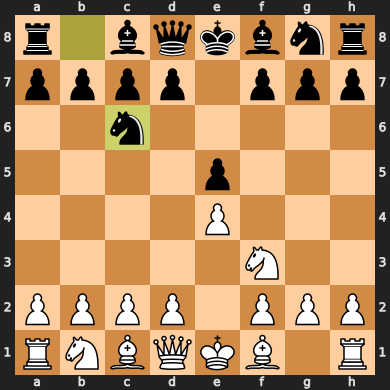

In [13]:
# Create four
board = chess.Board()

# First two moves
board.push_san("e4")
board.push_san("e5")
board.push(chess.Move.from_uci("g1f3"))
board.push(chess.Move.from_uci("b8c6"))
board

In [14]:
# Visualize attacks
SVG(chess.svg.board(board, size=300, lastmove=board.peek(), squares=attacked_squares(board, chess.WHITE)))

NameError: name 'attacked_squares' is not defined

In [15]:
# Color squares if attacked by a piece
SVG(chess.svg.board(board,
                    orientation=chess.BLACK,
                    lastmove=board.peek(),
                    check=board.king(chess.WHITE),
                    arrows=[chess.svg.Arrow(board.king(chess.WHITE), board.king(chess.BLACK))],
                    fill=dict.fromkeys(attacked_squares(board, chess.WHITE), "#ffcccc80"),
                    squares=attacked_squares(board, chess.WHITE),
                    size=300,
                    coordinates=False,
                    flipped=True,
                    colors=dict(white="#ffffff", black="#000000")))

NameError: name 'attacked_squares' is not defined

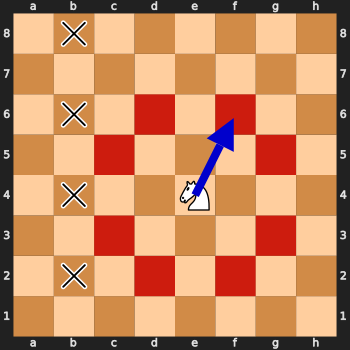

In [22]:
# Test
import chess
import chess.svg

board = chess.Board("8/8/8/8/4N3/8/8/8 w - - 0 1")

chess.svg.board(
    board,
    fill=dict.fromkeys(board.attacks(chess.E4), "#cc0000cc"),
    arrows=[chess.svg.Arrow(chess.E4, chess.F6, color="#0000cccc")],
    squares=chess.SquareSet(chess.BB_DARK_SQUARES & chess.BB_FILE_B),
    size=350)

In [38]:
# List location of all pieces and their type and color
pieces = []
for square in chess.SQUARES:
    piece = board.piece_at(square)
    if piece:
        pieces.append((piece.symbol(), piece.color,  piece.piece_type, square, chess.square_name(square)))

board_df = pd.DataFrame(pieces, columns=["symbol", "color", "piece_type", "square", "square_name"])
board_df["color"] = board_df["color"].apply(lambda x: "white" if x else "black")
board_df["piece_type_long"] = board_df["piece_type"].apply(lambda x: "pawn" if x == 1 else "knight" if x == 2 else "bishop" if x == 3 else "rook" if x == 4 else "queen" if x == 5 else "king")
board_df["attacked_by_white"] = board_df["square"].apply(lambda x: x in attacked_fields)
board_df

,symbol,color,piece_type,square,square_name,piece_type_long,attacked_by_white
0,R,white,4,0,a1,rook,False
1,N,white,2,1,b1,knight,True
2,B,white,3,2,c1,bishop,True
3,Q,white,5,3,d1,queen,True
4,K,white,6,4,e1,king,True
5,B,white,3,5,f1,bishop,True
6,R,white,4,7,h1,rook,False
7,P,white,1,8,a2,pawn,True
8,P,white,1,9,b2,pawn,True
9,P,white,1,10,c2,pawn,True


## Stockfish Engine

In [25]:
# stockfish engine
import chess.engine
import stockfish

board = chess.Board()
board.push_san("e4")
board.push_san("e5")
fen = board.fen()
stockfish = chess.engine.SimpleEngine.popen_uci("Stockfish-15.1_Mac_Apple_Silicon/stockfish-15.1_Mac_Apple_Silicon")

# Get best move
info = stockfish.analyse(board, chess.engine.Limit(time=0.1))
info

{'string': 'NNUE evaluation using nn-ad9b42354671.nnue enabled',
 'depth': 14,
 'seldepth': 20,
 'multipv': 1,
 'score': PovScore(Cp(+29), WHITE),
 'nodes': 96343,
 'nps': 953891,
 'hashfull': 39,
 'tbhits': 0,
 'time': 0.101,
 'pv': [Move.from_uci('g1f3'), Move.from_uci('g8f6')],
 'upperbound': True}

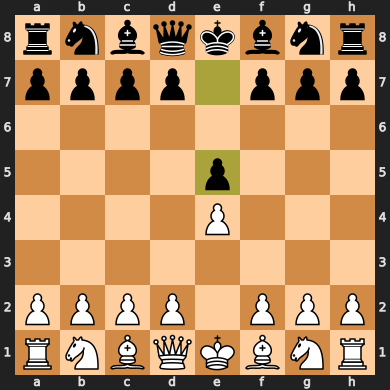

In [26]:
board

In [30]:
best_move = stockfish.play(board, chess.engine.Limit(time=0.1))
best_move

<PlayResult at 0x175fe8910 (move=g1f3, ponder=b8c6, info={}, draw_offered=False, resigned=False)>

# Polyglot opening book

In [41]:
# polyglot opening book
import chess.polyglot
board = chess.Board()
with chess.polyglot.open_reader("data/polyglot/performance.bin") as reader:
    for entry in reader.find_all(board):
        print(entry.move, entry.weight, entry.learn)

e2e4 1 486544384
d2d4 1 5120
c2c4 1 3825144832
